# House price prediction

We present here how to use linear regression to predict house prices for a set of fictitious data.

We start by loading some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

## Setup

Press the play button to setup the notebook and produce the dataset of house prices.

In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)

def generate_house_data():
  num_houses = 10
  # Generating synthetic data
  np.random.seed(0)
  area = 2.5 * np.random.randn(num_houses) + 25  # House area around 25 with some noise
  price = 5000 * area + np.random.randn(num_houses) * 500  # Price with a base of $50,000 per unit area + some noise
  # Reshape data
  df = pd.DataFrame({
      "Area": area,
      "Price": price
  })
  df.to_csv("house_prices.csv", index=False)

def conf_intervals_p_values(model, X_train, y_train):
  # Getting the estimated coefficients
  beta_hat = model.coef_[0]

  # Getting the residuals
  residuals = y_train - model.predict(X_train)

  # Calculating the standard error of the residuals
  sigma_hat = np.sqrt(np.sum(residuals**2) / (len(y_train) - 2))

  # Calculating the standard error of the coefficient
  SE_beta_hat = sigma_hat / np.sqrt(np.sum((X_train - np.mean(X_train, axis=0))**2))

  # Calculating the z-score for the coefficient
  z_score = beta_hat / SE_beta_hat

  # Calculating the p-value for the z-score
  p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

  # Calculating the confidence intervals for the coefficient
  confidence_interval = [beta_hat - 1.96*SE_beta_hat, beta_hat + 1.96*SE_beta_hat]  # 95% confidence interval

  return [confidence_interval[0]["Area"], confidence_interval[1]["Area"]], p_value

generate_house_data()

## Training the linear regression model

Start by reading the dataset from the file `house_prices.csv`.

In [3]:
import pandas as pd

df = pd.read_csv("house_prices.csv")
df.head()

,Area,Price
0,29.410,147122.676
1,26.000,130729.102
2,27.447,137614.744
3,30.602,153072.002
4,29.669,148566.406


Create the training and testing datasets.

In [4]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

Train a linear regression model using the class `LinearRegression`.

In [10]:
# Train your estimator
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprec

LinearRegression()

The code cell below creates a plot with the regression line. You do not need to anything here.

C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


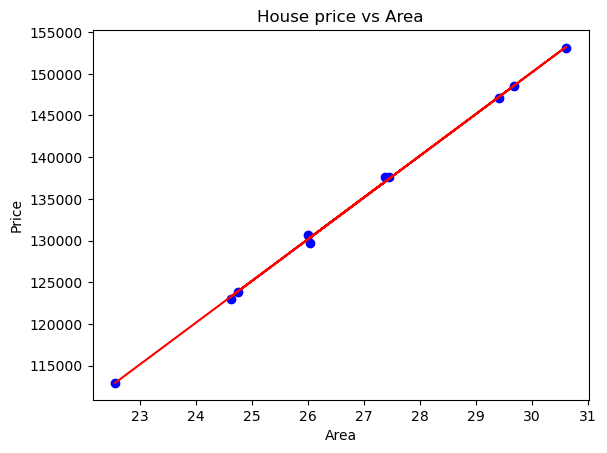

In [11]:
# Plotting the regression line
plt.scatter(X, y, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('House price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Finally, validate your estimator by computing its r2_score on the testing dataset. The command for this is `r2_score(y_test, y_pred)`, where `y_pred` is an object containing your predictions for the examples in `X_test`.

In [12]:
# Validate your estimator
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
r2_score(y_test, model.predict(X_test))

C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprec

0.9996005774131496